In [1]:
import os
from datasets import load_dataset
from PIL import Image
import pandas as pd
from easyocr import Reader
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import pytesseract


In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Show full content of each column (no truncation)
pd.set_option('display.width', None)

In [3]:
dataset = load_dataset("ahmedheakl/arocrbench_hindawi",split="train")


README.md:   0%|          | 0.00/478 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/13.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/200 [00:00<?, ? examples/s]

In [5]:
dataset

Dataset({
    features: ['image', 'text', 'source'],
    num_rows: 200
})

In [6]:
results = []
for sample in dataset:
    image = sample["image"]  # Already a PIL Image object
    if image.mode != "RGB":
        image = image.convert("RGB")
    ground_truth = sample["text"]
    results.append({
        "image": image,
        "ground_truth": ground_truth,
        "tesseract": None,
        "easyocr": None,
    })
print(f"Initialized results with {len(results)} samples.")

Initialized results with 200 samples.


### Tesseract Processing

In [7]:
for i, sample in enumerate(results):
    image = sample["image"]
    tesseract_text = pytesseract.image_to_string(image,lang='ara')
    results[i]['tesseract'] = tesseract_text
print("Tesseract Processing completeed")

Tesseract Processing completeed


## EasyOCR

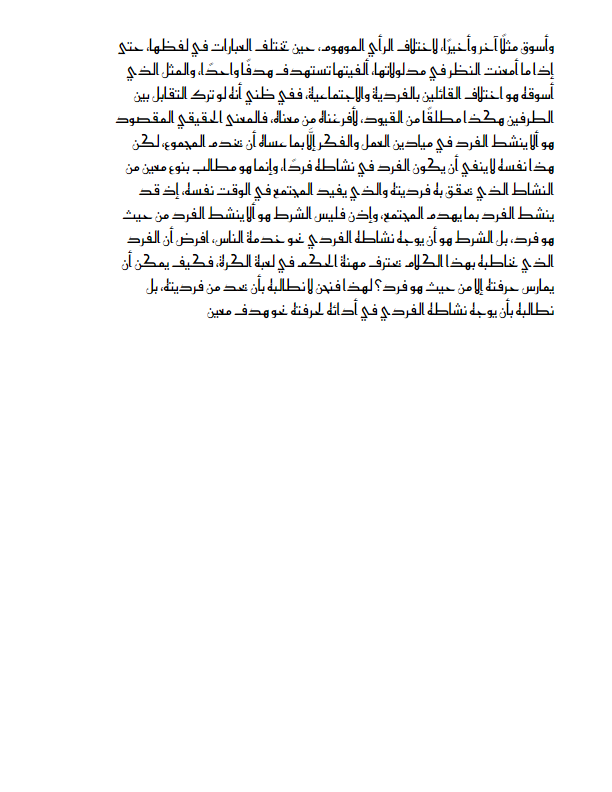

In [8]:
dataset[0]['image']

In [9]:
import numpy as np 
easyocr_reader = Reader(['ar'], gpu=True)
for i, sample in enumerate(results):
    image = sample["image"]
    image_np = np.array(image)
    easyocr_result = easyocr_reader.readtext(image_np, detail=0)
    easyocr_text = " ".join(easyocr_result)
    results[i]["easyocr"] = easyocr_text
print("EasyOCR processing completed.")

EasyOCR processing completed.


In [10]:
import re

def remove_diacritics(text):
    diacritics = [
        '\u0617', '\u0618', '\u0619', '\u061A',  # Small high signs
        '\u064B', '\u064C', '\u064D', '\u064E', '\u064F', '\u0650',  # Tanween and basic diacritics
        '\u0651', '\u0652', '\u0653', '\u0654', '\u0655', '\u0656',  # Shadda, sukun, etc.
        '\u0657', '\u0658', '\u0659', '\u065A', '\u065B', '\u065C', 
        '\u065D', '\u065E', '\u065F', '\u0670'   # Additional Arabic diacritics
    ]
    pattern = '[' + ''.join(diacritics) + ']'
    return re.sub(pattern, '', text)

In [11]:
df = pd.DataFrame(results)
df.head()

,image,ground_truth,tesseract,easyocr
0,<PIL.Image.Image image mode=RGB size=612x792 at 0x71ADDF3A38D0>,\t\t\tوأسوق مثلًا آخر وأخيرًا، لاختلاف الرأي الموهوم، حين تختلف العبارات في لفظها، حتى إذا\tما أمعنت النظر في مدلولاتها، ألفيتها تستهدف هدفًا واحدًا، والمثل الذي أسوقه هو اختلاف\tالقائلين بالفردية والاجتماعية، ففي ظني أنه لو ترك التقابل بين الطرفين هكذا مطلقًا من\tالقيود، لأفرغناه من معناه، فالمعنى الحقيقي المقصود هو ألا ينشط الفرد في ميادين العمل\tوالفكر إلَّا بما عساه أن يخدم المجموع، لكن هذا نفسه لا ينفي أن يكون الفرد في نشاطه فردًا،\tوإنما هو مطالب بنوع معين من النشاط الذي يحقق به فرديته والذي يفيد المجتمع في الوقت نفسه،\tإذ قد ينشط الفرد بما يهدم المجتمع، وإذن فليس الشرط هو ألا ينشط الفرد من حيث هو فرد، بل\tالشرط هو أن يوجه نشاطه الفردي نحو خدمة الناس، افرض أن الفرد الذي نخاطبه بهذا الكلام\tيحترف مهنة الحكم في لعبة الكرة، فكيف يمكن أن يمارس حرفته إلا من حيث هو فرد؟ لهذا فنحن لا\tنطالبه بأن يحد من فرديته، بل نطالبه بأن يوجه نشاطه الفردي في أدائه لحرفته نحو هدف معين,يمارس حرفتة إلامن ميث هو فرد؟ لهضا فنجن\nنطالبة بأذيو بة نشاطة الفردج فع أدائة لرفتة نوهد ف مهيز\n\n,"العبارات فإلفظهاء متر مبر مثلًاآنر وأنيرًاء لانتلاف الرأي _ مدلولاتها آلفيتهاتستهدف هدفًاواعداء والمثل | اداما آمننت النظر التقابل = هوانتاف القائلين بالفردية والبتماعية ففرطنر لآفرغناه من محناهء فالمسنرالقيقيالمقصود الطرفين هحذا مطلقامن = لحن ندم هوألاينشط الفرد فيميادين العمل والفكرلابما عساه أن بنوع محبل مز هذانفسه لاينفيآن يكون الفرد فينشاطه فرداء وإنما هو مطالب _ الوقت نفس. اذ قد إيفيد المجتمع فإ = قق بل فرديته النشاط الذي - الفرد من -ميث الشرط هوآلابنشط ينشط الفرد بمايهدم المبتمح وإذن ضو ندمة الناس ; افرض آن الفرد هوفرد بل الشرط هوآن يوبه نشاطل فإلعبة الحراء فحيف يمكن اا> اترو غاطبل بهذا الحلام د من فرديتهء بل إإمن ميث هوفرد ؟ لهذافنن لانطالبل بأن . يهارس حعرفته _موهدف مدين نطالبه بآن يوبه نشاطل الفرح دفي أدائه تنتلف واسوق الموهوف , الصد آنا لوترك سوقا لقبود المبموع والضي فليس الفرحي مهئة الذد رفنا"
1,<PIL.Image.Image image mode=RGB size=612x792 at 0x71ADDC334110>,\n\t\t\tنحن تعودنا تقسيم الكلام إلى منظوم ومنثور، وعندما نقرأ نثر عبد الحميد ونثر ابن\n\tالمقفع تُلهمنا هذه القراءة فكرة جديدة، فتقسيم الكلام إلى منثور ومنظوم لا يغني كثيرًا\n\tمن الناحية الأدبية.\n\t\t\t\t\n\t\t\tذلك أننا، عندما نقرأ عبد الحميد وابن المقفع، نجد في أنفسنا من اللذة مثل ما نجده\n\tعندما نقرأ زيادًا والحجاج وجريرًا والفرزدق والأخطل.\n\t\t\t\t\n\t\t\tومع ذلك فنحن عندما نقرأ عبد الحميد لا نسمعه ولا نراه، ولا نكوِّن لأنفسنا فكرة عنه،\n\tوإنما نفكر في شيء واحد، هو هذا الكلام الذي عندنا، ولا نسمع أنفسنا، بل يقرأ القارئ\n\tبعينه، وقلما يقرأ القارئ بصوته، وخصوصًا في هذا العصر.\n\t\t\t\t\n\t\t\tونحن عندما نقرأ عبد الحميد أو ابن المقفع، لا نجد عندهما اللذة الفنية، إذا كنا في\n\tطبقة واحدة، أو اشتركنا في ثقافة واحدة.\n\t\t\t\t\n\t\t\tوإنما يقرؤهما منا ذوو الثقافة العالية والساذجة والمتوسطة والبسيطة، وكلنا يجد لذة\n\tومتعة فنية.\n\t\t\t\t,"انحن تعودنا تقسيم الكلام إلى منظوم وملثور. وعددما نقرأ نثر عبد الحميد ولثر ابن المقفع,\nثُلهمنا هذه القراءة فكرة جديدة. فتقسيم الكلام إلى منتور ومنظوم لا يعني كثيرًا من الناحية\n\nالأدبية\n\nتلك أنناء عندما نقرأ عبد الحميد وابن المقفع نجد في أنفسنا من اللذة مثل ما نجده عندما.\nإنقرأ زيادًا والحجاج وجريرًا والفرزدق والأخطل.\n\nومع ذلك فنحن عددما تقرأ عيد الحميد لا تسمعه ولا تراه. ولا نكوّن لأنقسدا فكرة عنه.\n\nوإنما نفكر في شيء واحد. هو هذا الكلام الذي عندداء ولا تسمع أنفسناء بل يقرأ القارئ\nإبعينه. وقلما يقرا القارئ بصوته. وخصوصئًاً فى هذا العصر\n\nونحن عندما تقرأ عيد الحميد أو اين المققع. لا نجد عندهما اللذة الفنية:\n.واحدة. أو اشتركنا فى ثقافة واحدة\n\nذا كنا في طيقة.\n\nوإنما يقرؤهما منا ذوو الثقافة العالية والسانجة والمتوسطة والبسيطة. وكلنا يجد لذة وه\n\n",نحن تعودنا تقسيم الكلام إلى منظوم ومتورء وعندما نترانتر عبد الحميد ونترابن المقفع منذور ومنظوم لا يغنى كترا من الذاحية الكاام تلهمذا هذن القراءة فكرة جديدة الأدبة من اللذةمتل مانجده سنذما ذك انذاء سدمانقرا عذ الحيذ وابن المتنعء نجدفى نقرأ زياذا والحجاج وجريزا والفرزدق وآلآخطل لانسمعه ولانراه ولانكون لانفسذافكرة عذه فنحن نندمانترا نيذ أفذاء يل يترأ القارئ هو هذا الكذم الذي تتذذاء ولا واحذ وإنمأنفكر فى

In [12]:

df['ground_truth_t'] = df["ground_truth"].apply(remove_diacritics)
df['tesseract_t'] = df["tesseract"].apply(remove_diacritics)
df['easyocr_t'] = df["easyocr"].apply(remove_diacritics)

In [13]:
df.head()


,image,ground_truth,tesseract,easyocr,ground_truth_t,tesseract_t,easyocr_t
0,<PIL.Image.Image image mode=RGB size=612x792 at 0x71ADDF3A38D0>,\t\t\tوأسوق مثلًا آخر وأخيرًا، لاختلاف الرأي الموهوم، حين تختلف العبارات في لفظها، حتى إذا\tما أمعنت النظر في مدلولاتها، ألفيتها تستهدف هدفًا واحدًا، والمثل الذي أسوقه هو اختلاف\tالقائلين بالفردية والاجتماعية، ففي ظني أنه لو ترك التقابل بين الطرفين هكذا مطلقًا من\tالقيود، لأفرغناه من معناه، فالمعنى الحقيقي المقصود هو ألا ينشط الفرد في ميادين العمل\tوالفكر إلَّا بما عساه أن يخدم المجموع، لكن هذا نفسه لا ينفي أن يكون الفرد في نشاطه فردًا،\tوإنما هو مطالب بنوع معين من النشاط الذي يحقق به فرديته والذي يفيد المجتمع في الوقت نفسه،\tإذ قد ينشط الفرد بما يهدم المجتمع، وإذن فليس الشرط هو ألا ينشط الفرد من حيث هو فرد، بل\tالشرط هو أن يوجه نشاطه الفردي نحو خدمة الناس، افرض أن الفرد الذي نخاطبه بهذا الكلام\tيحترف مهنة الحكم في لعبة الكرة، فكيف يمكن أن يمارس حرفته إلا من حيث هو فرد؟ لهذا فنحن لا\tنطالبه بأن يحد من فرديته، بل نطالبه بأن يوجه نشاطه الفردي في أدائه لحرفته نحو هدف معين,يمارس حرفتة إلامن ميث هو فرد؟ لهضا فنجن\nنطالبة بأذيو بة نشاطة الفردج فع أدائة لرفتة نوهد ف مهيز\n\n,"العبارات فإلفظهاء متر مبر مثلًاآنر وأنيرًاء لانتلاف الرأي _ مدلولاتها آلفيتهاتستهدف هدفًاواعداء والمثل | اداما آمننت النظر التقابل = هوانتاف القائلين بالفردية والبتماعية ففرطنر لآفرغناه من محناهء فالمسنرالقيقيالمقصود الطرفين هحذا مطلقامن = لحن ندم هوألاينشط الفرد فيميادين العمل والفكرلابما عساه أن بنوع محبل مز هذانفسه لاينفيآن يكون الفرد فينشاطه فرداء وإنما هو مطالب _ الوقت نفس. اذ قد إيفيد المجتمع فإ = قق بل فرديته النشاط الذي - الفرد من -ميث الشرط هوآلابنشط ينشط الفرد بمايهدم المبتمح وإذن ضو ندمة الناس ; افرض آن الفرد هوفرد بل الشرط هوآن يوبه نشاطل فإلعبة الحراء فحيف يمكن اا> اترو غاطبل بهذا الحلام د من فرديتهء بل إإمن ميث هوفرد ؟ لهذافنن لانطالبل بأن . يهارس حعرفته _موهدف مدين نطالبه بآن يوبه نشاطل الفرح دفي أدائه تنتلف واسوق الموهوف , الصد آنا لوترك سوقا لقبود المبموع والضي فليس الفرحي مهئة الذد رفنا",\t\t\tوأسوق مثلا آخر وأخيرا، لاختلاف الرأي الموهوم، حين تختلف العبارات في لفظها، حتى إذا\tما أمعنت النظر في مدلولاتها، ألفيتها تستهدف هدفا واحدا، والمثل الذي أسوقه هو اختلاف\tالقائلين بالفردية والاجتماعية، ففي ظني أنه لو ترك التقابل بين الطرفين هكذا مطلقا من\tالقيود، لأفرغناه من معناه، فالمعنى الحقيقي المقصود هو ألا ينشط الفرد في ميادين العمل\tوالفكر إلا بما عساه أن يخدم المجموع، لكن هذا نفسه لا ينفي أن يكون الفرد في نشاطه فردا،\tوإنما هو مطالب بنوع معين من النشاط الذي يحقق به فرديته والذي يفيد المجتمع في الوقت نفسه،\tإذ قد ينشط الفرد بما يهدم المجتمع، وإذن فليس الشرط هو ألا ينشط الفرد من حيث هو فرد، بل\tالشرط هو أن يوجه نشاطه الفردي نحو خدمة الناس، افرض أن الفرد الذي نخاطبه بهذا الكلام\tيحترف مهنة الحكم في لعبة الكرة، فكيف يمكن أن يمارس حرفته إلا من حيث هو فرد؟ لهذا فنحن لا\tنطالبه بأن يحد من فرديته، بل نطالبه بأن يوجه نشاطه الفردي في أدائه لحرفته نحو هدف معين,يمارس حرفتة إلامن ميث هو فرد؟ لهضا فنجن\nنطالبة بأذيو بة نشاطة الفردج فع أدائة لرفتة نوهد ف مهيز\n\n,"العبارات فإلفظهاء متر مبر مثلاآنر وأنيراء لانتلاف الرأي _ مدلولاتها آلفيتهاتستهدف هدفاواعداء والمثل | اداما آمننت النظر التقابل = هوانتاف القائلين بالفردية والبتماعية ففرطنر لآفرغناه من محناهء فالمسنرالقيقيالمقصود الطرفين هحذا مطلقامن = لحن ندم هوألاينشط الفرد فيميادين العمل والفكرلابما عساه أن بنوع محبل مز هذانفسه لاينفيآن يكون الفرد فينشاطه فرداء وإنما هو مطالب _ الوقت نفس. اذ قد إيفيد المجتمع فإ = قق بل فرديته النشاط الذي - الفرد من -ميث الشرط هوآلابنشط ينشط الفرد بمايهدم المبتمح وإذن ضو ندمة الناس ; افرض آن الفرد هوفرد بل الشرط هوآن يوبه نشاطل فإلعبة الحراء فحيف يمكن اا> اترو غاطبل بهذا الحلام د من فرديتهء بل إإمن ميث هوفرد ؟ لهذافنن لانطالبل بأن . يهارس حعرفته _موهدف مدين نطالبه بآن يوبه نشاطل الفرح دفي أدائه تنتلف واسوق الموهوف , الصد آنا لوترك سوقا لقبود المبموع والضي فليس الفرحي مهئة الذد رفنا"
1,<PIL.Image.Image image mode=RGB size=612x792 at 0x71ADDC334110>,\n\t\t\tنحن تعودنا تقسيم الكلام إلى منظوم ومنثور، وعندما نقرأ نثر عبد الحميد ونثر ابن\n\tالمقفع تُلهمنا هذه القراءة فكرة جديدة، فتقسيم الكلام إلى منثور ومنظوم لا يغني كثيرًا\n\tمن الناحية الأدبية.\n\t\t

In [14]:
from jiwer import wer, cer 

for model in ["tesseract","easyocr"]:
    wer_score = wer(df["ground_truth"].tolist(), df[model].tolist())
    cer_score = cer(df["ground_truth"].tolist(), df[model].tolist())
    print(f"{model} - WER: {wer_score:.2f}, CER: {cer_score:.2f}")

tesseract - WER: 0.58, CER: 0.37
easyocr - WER: 0.78, CER: 0.46


In [15]:
from jiwer import wer, cer 

for model in ["tesseract_t","easyocr_t"]:
    wer_score = wer(df["ground_truth_t"].tolist(), df[model].tolist())
    cer_score = cer(df["ground_truth_t"].tolist(), df[model].tolist())
    print(f"{model} - WER: {wer_score:.2f}, CER: {cer_score:.2f}")

tesseract_t - WER: 0.56, CER: 0.35
easyocr_t - WER: 0.75, CER: 0.44


In [16]:
df.to_csv("khattat_hindawi_result.csv")


: 